In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
file = np.loadtxt(r"E:\data analysis and ML\for github\Well-X\Well-X.LAS" , skiprows=45)
cols = [ "DEPTH" , "CALI"  , "DT"  , "GR"   ,   "ILD"    ,     "ILM"     ,    "NPHI"    ,     "PEF"    ,  "RHOB" ]

data = pd.DataFrame( data=file , columns=cols)
data[data==-9999.0000] = np.nan
data[data==-99.9900] = np.nan
data = data[["DEPTH" , "GR" ,"DT" , "NPHI" , "PEF" , "ILD" , "ILM" , "RHOB"]]
data = data.rename(columns={"ILM" : "LLS" ,  "ILD" : "LLD" , })
data

,DEPTH,GR,DT,NPHI,PEF,LLD,LLS,RHOB
0,2372.0759,9.39,51.13,-0.0181,7.66,596.87,687.37,2.97
1,2372.2283,10.49,51.12,-0.0181,7.52,709.12,617.00,2.98
2,2372.3807,11.47,51.16,-0.0179,9.67,678.87,585.50,2.98
3,2372.5331,12.65,51.19,-0.0177,8.75,653.75,524.87,2.98
4,2372.6855,13.69,51.18,-0.0176,8.53,626.12,506.62,2.97
...,...,...,...,...,...,...,...,...
7801,3560.9485,31.58,68.65,0.0431,8.92,7.17,12.74,2.64
7802,3561.1009,31.58,68.65,0.0433,8.10,7.18,12.78,2.64
7803,3561.2533,31.58,68.65,0.0435,7.56,7.20,12.70,2.64
7804,3561.4057,31.58,68.65,0.0433,6.88,10.88,12.63,2.65


In [3]:
data.describe()

,DEPTH,GR,DT,NPHI,PEF,LLD,LLS,RHOB
count,7806.000000,7803.000000,7798.000000,7794.000000,7794.000000,7803.000000,7803.000000,7794.000000
mean,2966.817019,37.108070,73.071153,0.134376,7.244374,235.092355,187.055145,2.533254
std,343.439923,26.025362,14.953646,0.118514,6.165887,586.368400,436.745956,0.250139
min,2372.075900,2.810000,41.510000,-0.023900,2.530000,0.150000,0.220000,1.420000
25%,2669.446500,16.555000,63.700000,0.009000,5.520000,2.050000,2.210000,2.420000
50%,2966.817000,32.780000,70.190000,0.137450,6.330000,7.360000,8.140000,2.520000
75%,3264.187600,54.280000,81.677500,0.218400,7.620000,50.980000,60.290000,2.620000
max,3561.558100,180.750000,150.810000,0.590800,177.690000,2000.689900,2000.689900,3.050000


Loading well tops


In [4]:
wellTops = pd.read_excel(r"E:\data analysis and ML\for github\Well-X\Well-X_Tops.xls" ,skiprows=0)
wellTops

,Common Well Name,* Name,Depth (meters)
0,Well-X,Formation-A,2386.6280
1,Well-X,Formation-B,2456.1377
2,Well-X,Formation-C,2500.2285
3,Well-X,Member-1,2507.5410
4,Well-X,Formation-D,2558.4407


Loading Lithology file

In [5]:
Lithology = pd.read_excel(r"E:\data analysis and ML\for github\Well-X\well-x lith.xlsx" , skiprows=1)
Lithology


,* Well UWI,* Litho Crv Type,* Top Depth (meters),* Base Depth (meters),Litho Class
0,Well-x,LITH,2365.2139,2385.8877,Anhydrite
1,Well-x,LITH,2385.8877,2455.9705,Shale
2,Well-x,LITH,2455.9705,2470.1821,Anhydrite
3,Well-x,LITH,2470.1821,2471.3994,Shale
4,Well-x,LITH,2471.3994,2474.1950,Anhydrite
...,...,...,...,...,...
93,Well-x,LITH,3105.2793,3270.5115,Limestone
94,Well-x,LITH,3270.5115,3280.2275,Shale
95,Well-x,LITH,3280.2275,3295.4958,Limestone
96,Well-x,LITH,3295.4958,3313.5398,Shale


In [25]:
# To add lithology number for each lithology type to used later in plotting and color fill
def lith_category(Litho_Class):
    if Litho_Class == "Anhydrite":
        return 1.0
    elif Litho_Class == "Shale":
        return 3.0 
    elif Litho_Class == "Sandstone":
        return 2.0
    elif Litho_Class == "Salt":
        return 5.0
    elif Litho_Class == "Limestone":
        return 4.0


In [24]:
for i in range(Lithology.shape[0]):
    Lithology["Lith_Num"] = Lithology["Litho Class"].apply(lith_category)

In [26]:
Lithology

,* Well UWI,* Litho Crv Type,* Top Depth (meters),* Base Depth (meters),Litho Class,Lith_Num
0,Well-x,LITH,2365.2139,2385.8877,Anhydrite,1.0
1,Well-x,LITH,2385.8877,2455.9705,Shale,3.0
2,Well-x,LITH,2455.9705,2470.1821,Anhydrite,1.0
3,Well-x,LITH,2470.1821,2471.3994,Shale,3.0
4,Well-x,LITH,2471.3994,2474.1950,Anhydrite,1.0
...,...,...,...,...,...,...
93,Well-x,LITH,3105.2793,3270.5115,Limestone,4.0
94,Well-x,LITH,3270.5115,3280.2275,Shale,3.0
95,Well-x,LITH,3280.2275,3295.4958,Limestone,4.0
96,Well-x,LITH,3295.4958,3313.5398,Shale,3.0


Creat lithology dictionary to identify color and hash

In [8]:
Lithology_dict = {
                'Anhydrite':     {"lith" : 1 ,"Type" : "Anhydrite" , "color" : "#8874A3" , "hatsh": "x"},
                'Shale':         {"lith" : 3 ,"Type" : "Shale"     , "color" : "#008000" , "hatsh": "---"},
                'Sandstone':     {"lith" : 2 ,"Type" : "SandStone" , "color" : "#FFFF00" , "hatsh": "..."},
                'Limestone':     {"lith" : 4 ,"Type" : "Limestone" , "color" : "#0000FF" , "hatsh": "+++"},
                'Salt':          {"lith" : 5 ,"Type" : "Salt"      , "color" : "#FF0000" , "hatsh": "-|"},
                  }
Lithology_dict_dataframe = pd.DataFrame.from_dict(data=Lithology_dict , orient= "index")
Lithology_dict_dataframe

,lith,Type,color,hatsh
Anhydrite,1,Anhydrite,#8874A3,x
Shale,3,Shale,#008000,---
Sandstone,2,SandStone,#FFFF00,...
Limestone,4,Limestone,#0000FF,+++
Salt,5,Salt,#FF0000,-|


In [9]:
Lithology

,* Well UWI,* Litho Crv Type,* Top Depth (meters),* Base Depth (meters),Litho Class,Lith_Num
0,Well-x,LITH,2365.2139,2385.8877,Anhydrite,1.0
1,Well-x,LITH,2385.8877,2455.9705,Shale,3.0
2,Well-x,LITH,2455.9705,2470.1821,Anhydrite,1.0
3,Well-x,LITH,2470.1821,2471.3994,Shale,3.0
4,Well-x,LITH,2471.3994,2474.1950,Anhydrite,1.0
...,...,...,...,...,...,...
93,Well-x,LITH,3105.2793,3270.5115,Limestone,4.0
94,Well-x,LITH,3270.5115,3280.2275,Shale,3.0
95,Well-x,LITH,3280.2275,3295.4958,Limestone,4.0
96,Well-x,LITH,3295.4958,3313.5398,Shale,3.0


make lithology legend

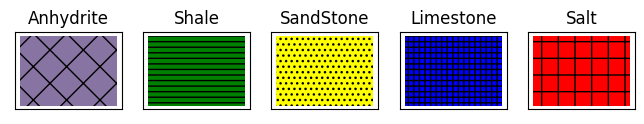

In [10]:
x = [1 , 1]
y = [0 , 1]
fig , axes = plt.subplots(ncols=5 , nrows=1,figsize =  (8,1) , subplot_kw=({"xticks" : [] , "yticks" : []}))
for ax , key in zip(axes.flat , Lithology_dict.keys()):
 lith_color = Lithology_dict[key]["color"]
 lith_hash = Lithology_dict[key]["hatsh"]
 lith_title = Lithology_dict[key]["Type"]
 ax.fill_betweenx(y , x , facecolor = lith_color , hatch = lith_hash)
 ax.set_title(lith_title)
 

To Display Lithology we should merge facies with the las file


In [11]:
# make list the values of depth of facies
# facies_depths = Lithology["* Top Depth (meters)"].values
# then add the last depth in the las file (5581) to list

facies_depths = [2365.2139, 2385.8877, 2455.9705, 2470.1821, 2471.3994, 2474.195 ,
                 2476.4016, 2480.4336, 2482.4878, 2483.5527, 2484.4658, 2499.358 ,
                 2502.4011, 2504.3792, 2508.259 , 2529.922 , 2532.2808, 2557.9827,
                 2558.5845, 2562.2363, 2566.5537, 2573.1116, 2577.874 , 2597.9822,
                 2620.207 , 2625.1716, 2626.389 , 2629.0515, 2630.9536, 2632.7034,
                 2633.6924, 2635.518 , 2636.4312, 2638.7134, 2640.9197, 2643.3352,
                 2645.313 , 2648.1206, 2648.965 , 2662.2595, 2664.2375, 2673.5203,
                 2674.2798, 2675.0215, 2678.7493, 2681.412 , 2682.7053, 2683.6184,
                 2685.292 , 2686.2812, 2687.27  , 2689.6284, 2690.237 , 2692.7476,
                 2694.6868, 2710.0745, 2718.1387, 2718.8994, 2719.9646, 2725.2139,
                 2725.518 , 2726.203 , 2726.5833, 2730.1406, 2741.932 , 2745.051 ,
                 2745.2795, 2747.7139, 2755.607 , 2758.8022, 2766.8665, 2767.6272,
                 2772.4204, 2773.257 , 2776.7568, 2777.7456, 2781.9985, 2804.7527,
                 2917.1362, 2923.756 , 2927.2014, 2928.399 , 2940.086 , 3044.379 ,
                 3063.075 , 3065.51  , 3070.117 , 3071.216 , 3075.429 , 3076.6172,
                 3081.182 , 3082.8555, 3088.01  , 3105.2793, 3270.5115, 3280.2275,
                 3295.4958, 3556.9478,3561.5581]
print(len(facies_depths))

99


In [12]:
# make list for the value of lithology_Num
# facies_id = Lithology["Lithology_Num"].values

facies_id = [1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1,
             2, 3, 2, 3, 2, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
             2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
             3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
             2, 3, 2, 3, 2, 3, 2, 3, 1, 5, 3, 2, 3, 2, 3, 4, 3,
             4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,4]
print(len(facies_id))

98


In [13]:
facies_list = []
for i in range(len(data["DEPTH"])):
    # print(data["DEPTH"][i])
    for j in range(len(facies_depths)-1):
        # print(j)
        if data["DEPTH"][i] > facies_depths[j] and data["DEPTH"][i] <= facies_depths[j+1]:
            facies_list.append(facies_id[j])
print(len(facies_list))

7806


In [14]:
header = [ "DEPTH" , "CALI"  , "DT"  , "GR"   ,   "ILD"    ,     "ILM"     ,    "NPHI"    ,     "PEF"    ,  "RHOB" ]
df_data = pd.DataFrame(data=data , columns=header)
df_data["Facies"] = facies_list
df_data
df_data.to_excel("Exported_log_with_facies.xlsx")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9560\711556746.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,25),(0,0),colspan=2)
c:\Python310\lib\site-packages\matplotlib\ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


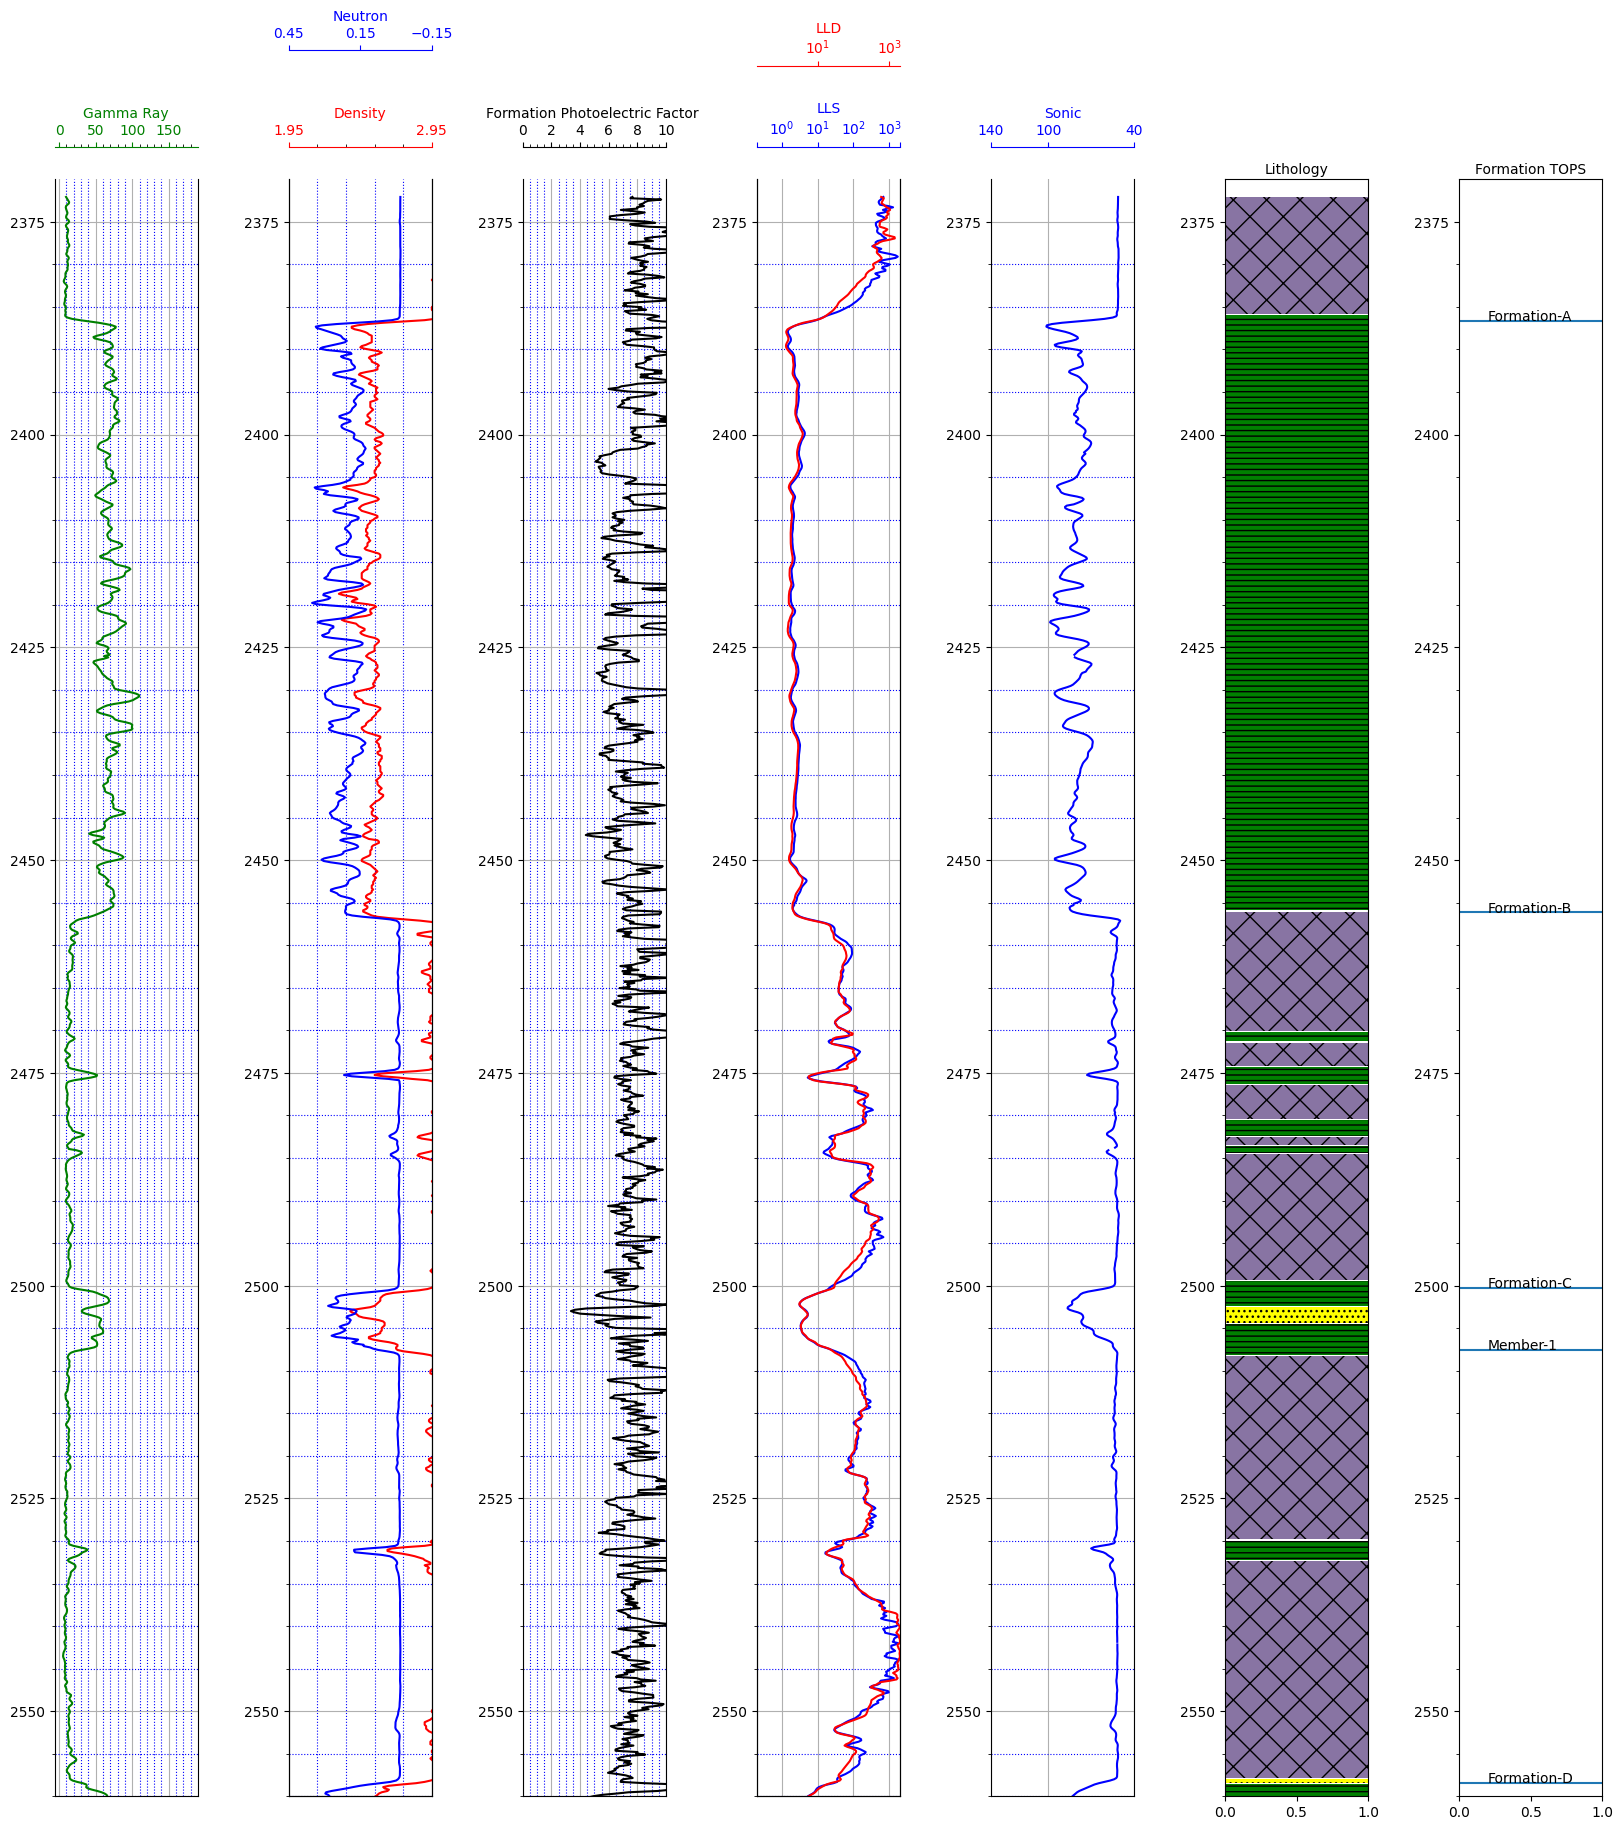

In [23]:
fig , ax = plt.subplots(figsize=(25,21)) 

# plots parameters
ax1 = plt.subplot2grid((1,25),(0,0),colspan=2)
ax2 = plt.subplot2grid((1,25),(0,3),colspan=2 , sharey = ax1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,25),(0,6),colspan=2, sharey = ax1)
ax5 = plt.subplot2grid((1,25),(0,9),colspan=2, sharey = ax1)
ax6 = ax5.twiny()
ax7 = plt.subplot2grid((1,25),(0,12),colspan=2, sharey = ax1)

# lithology track
ax8 = plt.subplot2grid((1,25),(0,15),colspan=2, rowspan=1 , sharey = ax1)

# Formation top track
ax9 = plt.subplot2grid((1,25),(0,18),colspan=2, rowspan=1, sharey = ax1)



# general parameters
for ax in [ax1 , ax2 , ax4 , ax5,ax7]:
    ax.grid(which="major")
    ax.grid(which="minor" , linestyle = "dotted" , color = "blue")
    ax.minorticks_on()
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

# GR track
ax1.plot(data["GR"] , data["DEPTH"] , color = "green")
ax1.set_ylim(2560 ,2370)
ax1.set_xlabel("Gamma Ray")
ax1.xaxis.label.set_color("green")
ax1.xaxis.set_ticks([0 , 50 , 100 , 150])
ax1.tick_params(axis="x" , colors = "green")
ax1.spines["top"]
ax1.spines["top"].set_edgecolor("green")
ax1.spines["top"].set_position(("axes" , 1.02))

# Density Nutron track
    # Density track
ax2.plot(data["RHOB"] , data["DEPTH"] , color = "red")
ax2.set_xlabel("Density")
ax2.xaxis.label.set_color("red")
ax2.set_xlim(1.95 , 2.95)
ax2.xaxis.set_ticks([1.95 , 2.95])
ax2.tick_params(axis="x" , colors = "red")
ax2.spines["top"]
ax2.spines["top"].set_edgecolor("red")
ax2.spines["top"].set_position(("axes" , 1.02))

    # Neutron track
ax3.plot(data["NPHI"] , data["DEPTH"] , color = "blue")
ax3.set_xlabel("Neutron")
ax3.xaxis.label.set_color("blue")
ax3.set_xlim(0.45 , -0.15)
ax3.xaxis.set_ticks([0.45 ,0.15 ,-0.15])
ax3.tick_params(axis="x" , colors = "blue")
ax3.spines["top"]
ax3.spines["top"].set_edgecolor("blue")
ax3.spines["top"].set_position(("axes" , 1.08))

# PEF track

ax4.plot(data["PEF"] , data["DEPTH"] , color = "black")
ax4.set_xlabel("Formation Photoelectric Factor ")
ax4.xaxis.label.set_color("black")
ax4.set_xlim(1 , 10)
ax4.xaxis.set_ticks([0 , 2 , 4 , 6,8,10])
ax4.tick_params(axis="x" , colors = "black")
ax4.spines["top"]
ax4.spines["top"].set_edgecolor("black")
ax4.spines["top"].set_position(("axes" , 1.02))

# Resistivity track
    # LLS curve
ax5.plot(data["LLS"] , data["DEPTH"] , color = "blue")
ax5.set_xlabel("LLS")
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.2 , 2000)
ax5.xaxis.set_ticks([0.2,1,10,100,1000,2000])
ax5.semilogx()
ax5.tick_params(axis="x" , colors = "blue")
ax5.spines["top"]
ax5.spines["top"].set_edgecolor("blue")
ax5.spines["top"].set_position(("axes" , 1.02))


   # LLD track
ax6.plot(data["LLD"] , data["DEPTH"] , color = "red")
ax6.set_xlabel("LLD")
ax6.xaxis.label.set_color("red")
ax6.set_xlim(0.2 , 2000)
ax5.xaxis.set_ticks([0.2,1,10,100,1000,2000])
ax6.semilogx()
ax6.tick_params(axis="x" , colors = "red")
ax6.spines["top"]
ax6.spines["top"].set_edgecolor("red")
ax6.spines["top"].set_position(("axes" , 1.07))


    # DT track
ax7.plot(data["DT"] , data["DEPTH"] , color = "blue")
ax7.set_xlabel("Sonic")
ax7.xaxis.label.set_color("blue")
ax7.set_xlim(140 , 40)
ax7.xaxis.set_ticks([140 ,100, 40])
ax7.tick_params(axis="x" , colors = "blue")
ax7.spines["top"]
ax7.spines["top"].set_edgecolor("blue")
ax7.spines["top"].set_position(("axes" , 1.02))
ax7.minorticks_on()




# # Lithology tracks
ax8.set_xlim(0 , 1)
ax8.set_xlabel("Lithology")
ax8.xaxis.set_label_position("top")

for key in Lithology_dict.keys():
    colors = Lithology_dict[key]["color"]
    hatsh = Lithology_dict[key]["hatsh"]
    ax8.fill_betweenx(df_data["DEPTH"] , 0 , df_data["Facies"] , where=(df_data["Facies"] == Lithology_dict[key]["lith"]) ,facecolor = colors, hatch = hatsh)


# #Formation Tops
ax9.set_xlabel("Formation TOPS")
ax9.xaxis.set_label_position("top")
for i in range(len(wellTops)):
    ax9.axhline(y=wellTops["Depth (meters)"][i] , xmin=0 , xmax=1, linestyle ="solid")
    ax9.text(0.2 , wellTops["Depth (meters)"][i] , wellTops["* Name"][i])

 
